# Factors influencing interest rate on loans

## Investigation Overview
In this investigation, I wanted to look at the factors or features that could that could influence the interest rate on loans. The main focus was on the some of the variables like 'Term' , 'incomeRange', 'LoanOriginalAmount' , 'ProsperScore' and 'EmploymentStatus'.

## Dataset Overview
This dataset contains about 113,937 entries and 81 columns. However, since analysing all the variables would be time consuming and confusing, some important features are selectd. Some data entries have also been removied from the analysis due to inconsistencies or missing information. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans_data = pd.read_csv('loan_data.csv')

In [3]:
# Only interested in these variables 
intersted_in_columns = ['ListingKey', 'ListingNumber', 'Term' , 'LoanStatus', 'EstimatedEffectiveYield' ,  'BorrowerAPR' , 
        'BorrowerRate' , 'ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore', 'ListingCategory (numeric)', 
        'EmploymentStatus','Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'IncomeVerifiable', 
        'StatedMonthlyIncome', 'MonthlyLoanPayment','Recommendations', 'DebtToIncomeRatio','LoanOriginalAmount' ,
        'PercentFunded','IncomeRange','InvestmentFromFriendsAmount','Investors','BorrowerState']
loan_df = loans_data[intersted_in_columns]

In [4]:
# Data wrangling, removing loans data with inconsistent, duplictates or missing data
# Drop duplicates
loan_df.drop_duplicates('ListingKey', inplace = True)
# Drop missing values
loan_df.dropna(inplace = True)

## Income Range
The income range in the dataset is grouped into five groups
- 1-24,999
- 25,000-49,999
- 50,000-74,999
- 75,000,99,999
- 100,000


Most of the people in the dataset are in the middle income range groups, the 50,000-74,999 income range group has the highest borrowers about 31% of all borrowers and only about 4% of the borrowers have income range below 25,000.

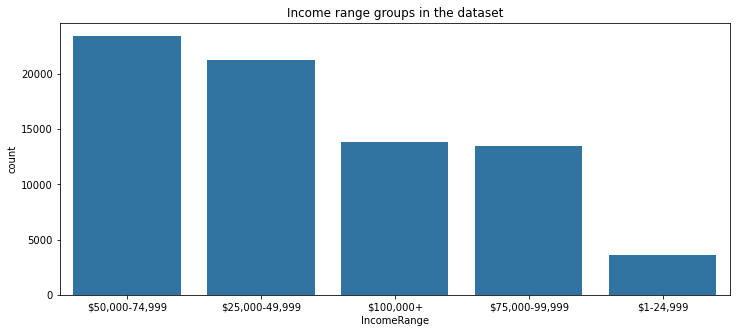

In [5]:
#First let's set the base color 
base_color = sb.color_palette()[0]

# incomeRange plotting
loan_df = loan_df[loan_df['IncomeRange'] != 'Not employed']
plt.figure(figsize=[12, 5])
plt.title('Income range groups in the dataset')
sb.countplot(data = loan_df, x = 'IncomeRange', color = base_color);


## Employment status of all borrowers

Huge number of the dataste are employed accounting for the employed group which contains about 86% of all borrwers plus the fultime group as well as the part time group which combined als account for about 10% of the dataset, so about 96% of all borrowers in the dataset are employed.

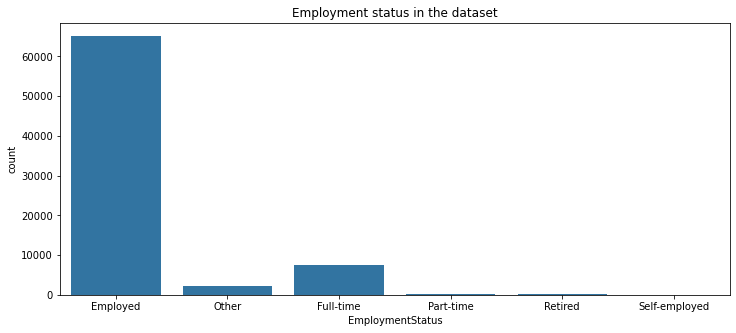

In [6]:
# Plotting for EmploymentStatus
plt.figure(figsize=[12, 5])
plt.title('Employment status in the dataset')
sb.countplot(data = loan_df, x = "EmploymentStatus", color = base_color);

## The Distribution of Term Length 
Most of borrowers in the dataset chose the 36 months term. About 68% of the 75,486 borrowers in the dataset opted for the 36 months term and about 30% of them have opted for the 69 months term and only about 1% have opted for the 12 months term

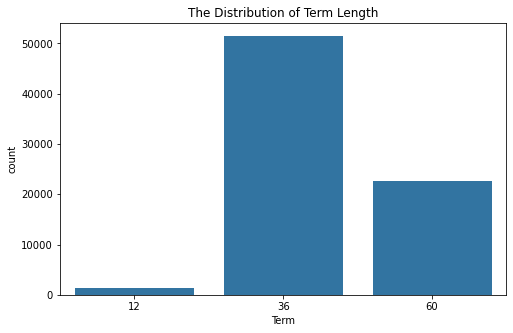

In [7]:
#plotting countplot for Term length
plt.figure(figsize=[8, 5])
plt.title('The Distribution of Term Length')
sb.countplot(data = loan_df, x = 'Term', color = base_color);

## Distribution of Borrower Rates
The Borrower's interest rate for this loan. The borrowerRate takes range of values from 0.04 at the lowest to 0.36 at the highest. The Borrower's interest rate for this loan seems to follow an approximately unimodal distribution, with the peak around 0.22. There seems to be a spike that occurs around 0.32.

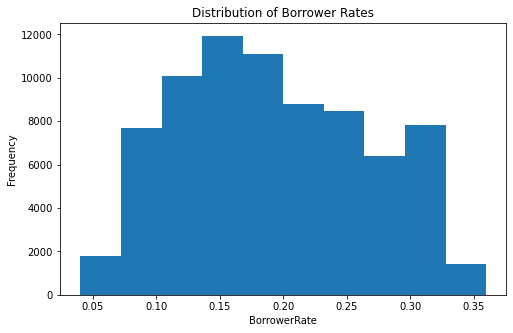

In [18]:
#Plot the histogram fro borrwerrate
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerRate')
plt.title('Distribution of Borrower Rates')
plt.xlabel('BorrowerRate');
plt.ylabel('Frequency');

## Loan size Distribution
loan amount in the dataset take on a very large range of values, from about  1000 𝑎𝑡 𝑡ℎ𝑒 𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜 𝑎𝑏𝑜𝑢𝑡 35, 000 at the highest. Plotted on a logarithmic scale, the distribution of loan amount takes on a unimodal shape.

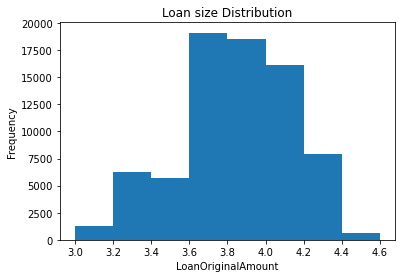

In [19]:
# Plotting loan size on logarithmic scale
# direct data transform
log_data = np.log10(loan_df['LoanOriginalAmount']) 
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.title('Loan size Distribution')
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Frequency');

## Interest Rates vs Other Numeric Features
BorrowerRate is negatively related to prosperScore. This is expected, the higher the prosperScore the lower the risk and the lower the risk the lower the interst rate. borrowerRate is also negatively related to loan origin amount. This is also expected. Interestingly,  there appears to be negative relation between income and loan size.

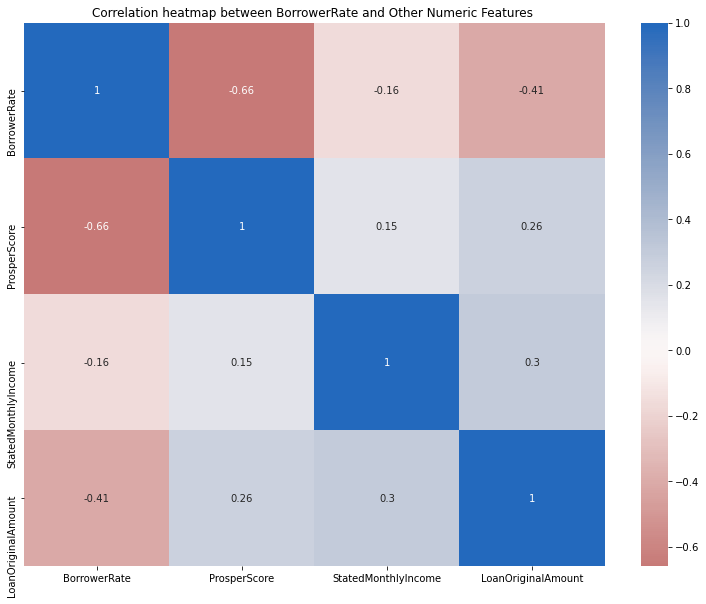

In [10]:
# Select The numeric variables to be analyzed
numeric_vars = [ 'BorrowerRate', 'ProsperScore', 'StatedMonthlyIncome', 'LoanOriginalAmount' ]
# correlation heatmap
plt.figure(figsize = [13, 10])
plt.title('Correlation heatmap between BorrowerRate and Other Numeric Features ')
sb.heatmap(loan_df[numeric_vars].corr(), annot = True, 
           cmap = 'vlag_r', center = 0);

## Employment Status vs BorrowerRate
Employment Status takes six option: Emplyed, Ful-time, Part-time, Self-employed, Retired and Other. Interest rates for each group is sigificantly different as shown below. It appears that fulltime and partime employees had highest rates while the group with lowes rates are the selef-employed.

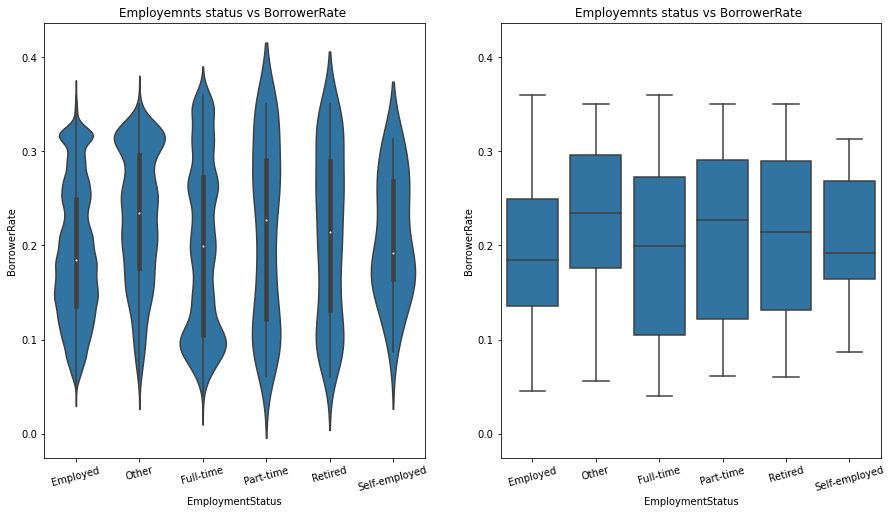

In [11]:
#Side by side violine and box plot of employment status and borrowerRate
loan_df_sub = loan_df[(loan_df['BorrowerRate'] <= 10) ]

plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation = 15);
plt.title('Employemnts status vs BorrowerRate ')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'BorrowerRate', color = base_color)
plt.ylim(ax1.get_ylim()) 
plt.xticks(rotation = 15);
plt.title('Employemnts status vs BorrowerRate ');

## Term length vs BorrowerRate
The length of term is measure in months. One can opt between threr option: The 12 months term, 36 months term and 60 months term. The relation between interest rates and term is positve indicating that the longer the term the more interest rate and that is inline with what was expected. Loan providers increas the intrest rate when the term is longer.

Text(0.5, 1.0, 'Term vs BorrowerRate ')

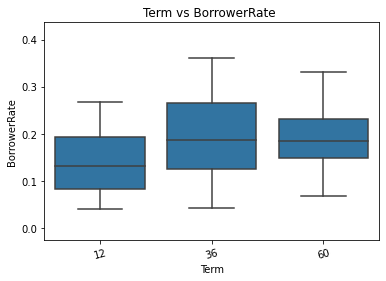

In [12]:
# box plot
sb.boxplot(data = loan_df, x = 'Term', y = 'BorrowerRate', color = base_color)
plt.ylim(ax1.get_ylim()) 
plt.xticks(rotation = 15);
plt.title('Term vs BorrowerRate ')

## BorrowerRate by loan size and term
As established earlier loan size is negative correlated with interest rate. However, interstingly when the term is introduced in to chart it mattered little. it can be observed that the length of the term does not change much about this relation.

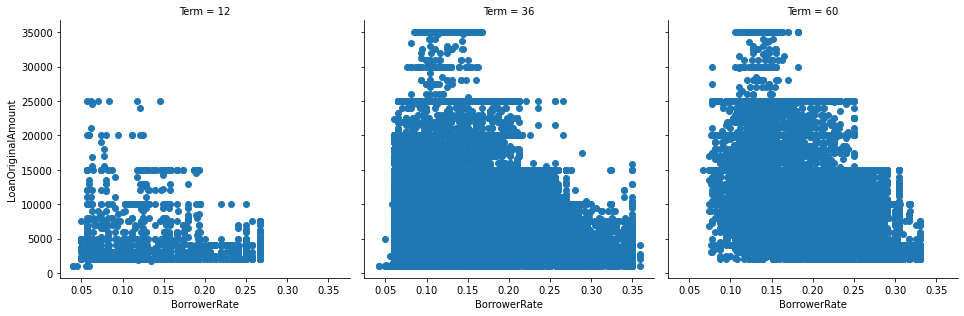

In [13]:
g = sb.FacetGrid(data = loan_df, col = 'Term', size = 4.5,
                margin_titles = True)
plt.title('BorrowerRate by loan size and term ')
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount');

In [20]:
!jupyter nbconvert --to slides --TemplateExporter.exclude_input=True slide_deck_template.ipynb

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 802122 bytes to slide_deck_template.slides.html
